# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [7]:
import math
from scipy.misc import derivative

def f(x):
    return (math.tan(math.sin(x)+math.cos(2*x+3)))**2

derivative(f,1.0,dx=1e-6)

55.3859176464222

## Задание 2

Дан объект в $2D$ пространстве

(-200, 200)

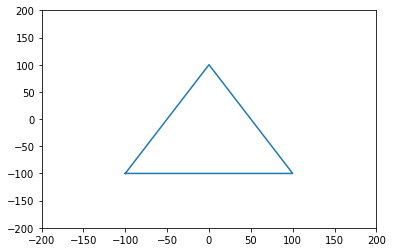

In [9]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:

Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)

(-200, 200)

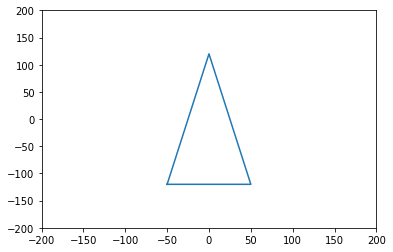

In [11]:
# масштабирование
B = [[0.5,0,0],
     [0,1.2,0],
     [0,0,1]]
A1 = A @ B
x = A1[:,0]
y = A1[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

(-200, 500)

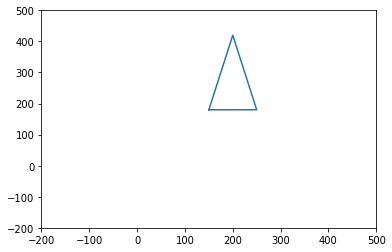

In [13]:
# смещение
B1 = [[200,300,0],
      [200,300,0],
      [200,300,0],
      [200,300,0]]
A2 = A1 + B1
x = A2[:,0]
y = A2[:,1]
plt.plot(x, y)
plt.ylim([-200, 500])
plt.xlim([-200, 500]) 

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [14]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [17]:
res = np.linalg.eig(m)
print('собственные значения',res[0])
print('собственные вектора',res[1])

собственные значения [ 3. -1.]
собственные вектора [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [18]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [19]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

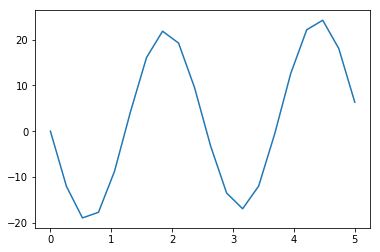

In [20]:
plt.plot(x, fx)
plt.show()

In [26]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [36]:
# Используем функцию minimize, которая будет минимизировать функцию ошибки error.
# Принимаем начальные значения параметров а=0 и b=0.
x0 = [0,0]
res1 = minimize(error, x0,  method='COBYLA')
res1

     fun: 0.076745661115651842
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])

In [ ]:
# Получили а=3 и b=-2,5. Проверяем на графике:

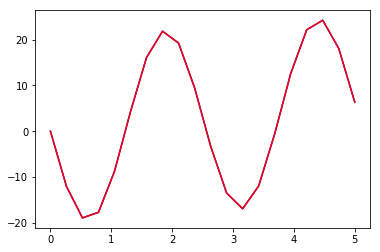

In [38]:
plt.plot(x, fx, color='blue')
plt.plot(x, f(x, res1.x[0], res1.x[1]), color='red')
plt.show()

In [ ]:
Параметры а=3 и b=-2,5 оптимальны.

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [39]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(raitings)
sim

array([[ 1.        ,  0.82602919,  0.84921529,  0.78340116,  0.81917632,
         0.74118548,  0.72735828,  0.80967522,  0.91065982,  0.86010776],
       [ 0.82602919,  1.        ,  0.81234325,  0.84635337,  0.87138052,
         0.82713107,  0.82629684,  0.80026003,  0.82526308,  0.81968127],
       [ 0.84921529,  0.81234325,  1.        ,  0.84669374,  0.78394299,
         0.79097985,  0.67616223,  0.76289552,  0.82112077,  0.91873051],
       [ 0.78340116,  0.84635337,  0.84669374,  1.        ,  0.69153409,
         0.78665792,  0.83274211,  0.82934667,  0.7770666 ,  0.8588687 ],
       [ 0.81917632,  0.87138052,  0.78394299,  0.69153409,  1.        ,
         0.7764434 ,  0.78200468,  0.81236869,  0.87948477,  0.84574789],
       [ 0.74118548,  0.82713107,  0.79097985,  0.78665792,  0.7764434 ,
         1.        ,  0.74011801,  0.84451685,  0.80622876,  0.85514908],
       [ 0.72735828,  0.82629684,  0.67616223,  0.83274211,  0.78200468,
         0.74011801,  1.        ,  0.82669174

In [64]:
for i in range(len(sim)):
    print(i,np.argsort(sim[i])[-2])
    

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2
